# Tenma Log Grapher

Opening 2021-09-16_12-49-15_tenma_multimeter_log.csv...

==== PLOTTING ====


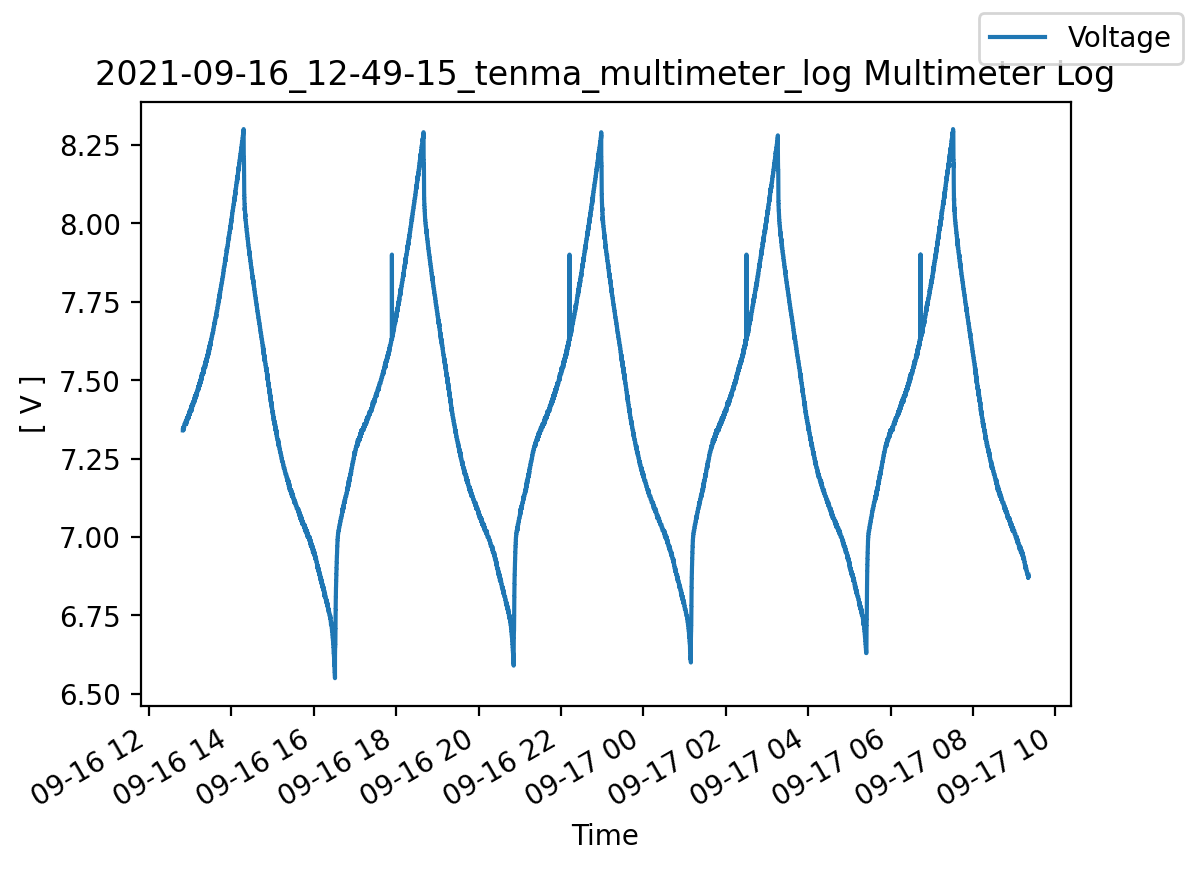

In [8]:
%matplotlib inline

try:
    import pandas as pd
except:
    print("This script requires the pandas library\nInstall it using the 'pip install pandas' command")
    quit()

try:
    import matplotlib.pyplot as plt
except:
    print("This script requires the matplotlib library\nInstall it using the 'pip install matplotlib' command")
    quit()

import os
import datetime as dt
import tkinter as tk
from tkinter import filedialog
from pathlib import Path
import shelve
import datetime

def get_timestamp_from_string(string):
    return dt.datetime.fromisoformat(string)

def get_file_open_name_with_tkinter():
    shelfFile = shelve.open('mydata')

    # try to open saved variables from shelfFile, if the saved variables are not there,
    # set the last open variable to "/"
    try:
        last_open_dir = shelfFile['last_open_dir']
    except KeyError:
        last_open_dir = "/"

    root = tk.Tk()
    root.attributes("-topmost", True)
    root.withdraw()
    this_file =  Path(filedialog.askopenfilename(initialdir = last_open_dir,title = "Select file",filetypes = (("CSV files","*.csv"),("Text files","*.txt"),("all files","*.*"))))
    root.destroy()

    # save the last opened folder to the shelfFile
    shelfFile['last_open_dir'] = this_file.parent
    shelfFile.close()
    
    return this_file

### ========== PROGRAM ========== ###

filename = get_file_open_name_with_tkinter()
#TODO - if nothing gets picked, or cancel pressed, stop cell

print (f"Opening {filename.name}...")

if ((filename.suffix == ".csv")):
    df = pd.read_csv(filename, index_col = False)
else:
    print("ERROR - This script only works with csv files")
    print("Quitting...")
    quit()
    
print()
print("==== PLOTTING ====")

# add check to make sure mode is the same all the way through the log

df["datetime"] = df["Time"].apply(get_timestamp_from_string)

series_label = df.loc[1,'Mode']
y_label = f'[ {df.loc[1, "Actual Unit"]} ]'

fig, ax = plt.subplots(dpi=200)

ax.plot(df['datetime'],df['Actual Value'], label=series_label)

ax.set_title(filename.stem)
ax.set_xlabel("Time")
ax.set_ylabel(y_label)
plt.xticks(rotation=30, ha='right')  
          
fig.legend()
# fig.show()

plt.savefig(filename.parent / (filename.stem +  '-GRAPH.png'),dpi=200)

In [ ]:
df['Actual Value'].plot()

## Display Value Plot

Opening 2023-02-06_16-35-35_b8_overnight_qui_load_test.csv...

==== PLOTTING ====


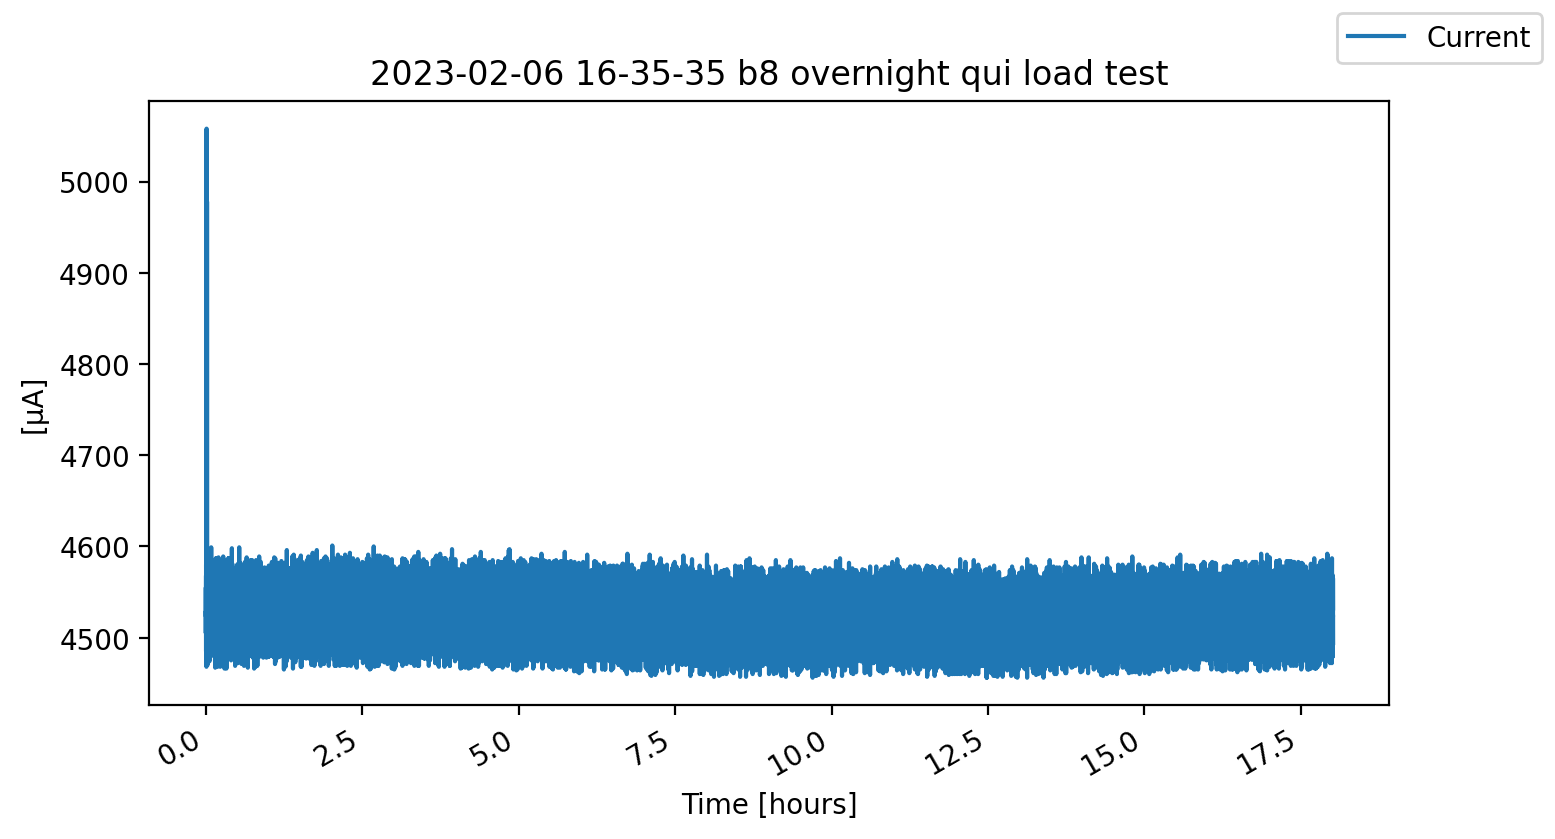

In [9]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

import os
import datetime as dt
import tkinter as tk
from tkinter import filedialog
from pathlib import Path
import shelve
import datetime

def get_timestamp_from_string(string):
    return dt.datetime.fromisoformat(string)

def get_file_open_name_with_tkinter():
    shelfFile = shelve.open('mydata')

    # try to open saved variables from shelfFile, if the saved variables are not there,
    # set the last open variable to "/"
    try:
        last_open_dir = shelfFile['last_open_dir']
    except KeyError:
        last_open_dir = "/"

    root = tk.Tk()
    root.attributes("-topmost", True)
    root.withdraw()
    this_file =  Path(filedialog.askopenfilename(initialdir = last_open_dir,title = "Select file",filetypes = (("CSV files","*.csv"),("Text files","*.txt"),("all files","*.*"))))
    root.destroy()

    # save the last opened folder to the shelfFile
    shelfFile['last_open_dir'] = this_file.parent
    shelfFile.close()
    
    return this_file

### ========== PROGRAM ========== ###

filename = get_file_open_name_with_tkinter()
#TODO - if nothing gets picked, or cancel pressed, stop cell

print (f"Opening {filename.name}...")

if ((filename.suffix == ".csv")):
    df = pd.read_csv(filename, index_col = False)
else:
    print("ERROR - This script only works with csv files")
    print("Quitting...")
    quit()
    
print()
print("==== PLOTTING ====")

# add check to make sure mode is the same all the way through the log

df["datetime"] = df["Time"].apply(get_timestamp_from_string)
df['elapsed time'] = df["Timestamp"].diff().cumsum()

series_label = df.loc[1,'Mode']
y_label = f'[{df.loc[1, "Display Unit"]}]'

fig, ax = plt.subplots(dpi=200)
# fig.set_size_inches(8, 4)

test_time = df['elapsed time'].max()

if (test_time > (2 * 60 * 60)):
    # test is over 2 hours long
    # plot time in hours
    ax.plot(df['elapsed time']/(60*60),df['Display Value'], label=series_label)
    ax.set_xlabel("Time [hours]")
elif (test_time > (3 * 60)):
    # test is over 3 minutes
    # plot time in minutes
    ax.plot(df['elapsed time']/(60),df['Display Value'], label=series_label)
    ax.set_xlabel("Time [mins]")
else:
    # plot time in seconds
    ax.plot(df['elapsed time'],df['Display Value'], label=series_label)
    ax.set_xlabel("Time [secs]")


title = filename.stem.replace("_", " ")
ax.set_title(title)
ax.set_ylabel(y_label)
plt.xticks(rotation=30, ha='right')  
          
fig.legend()

plt.savefig(filename.parent / (filename.stem +  '-GRAPH.png'),dpi=200)

In [1]:
foo = ['a', 'b', 'c']

for count, value in enumerate(foo):
    print(count, value)

0 a
1 b
2 c


In [8]:
x_coords = []

In [31]:
print(x_coords)
if (len(x_coords) > 0):
    x_coords.append(x_coords[-1] + 1) # add the next value to the x_coords, note that this should probably be elapsed time
else:
    x_coords.append(0)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
